<a href="https://colab.research.google.com/github/promckkon/MK-DCNN/blob/main/ComPSO26217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


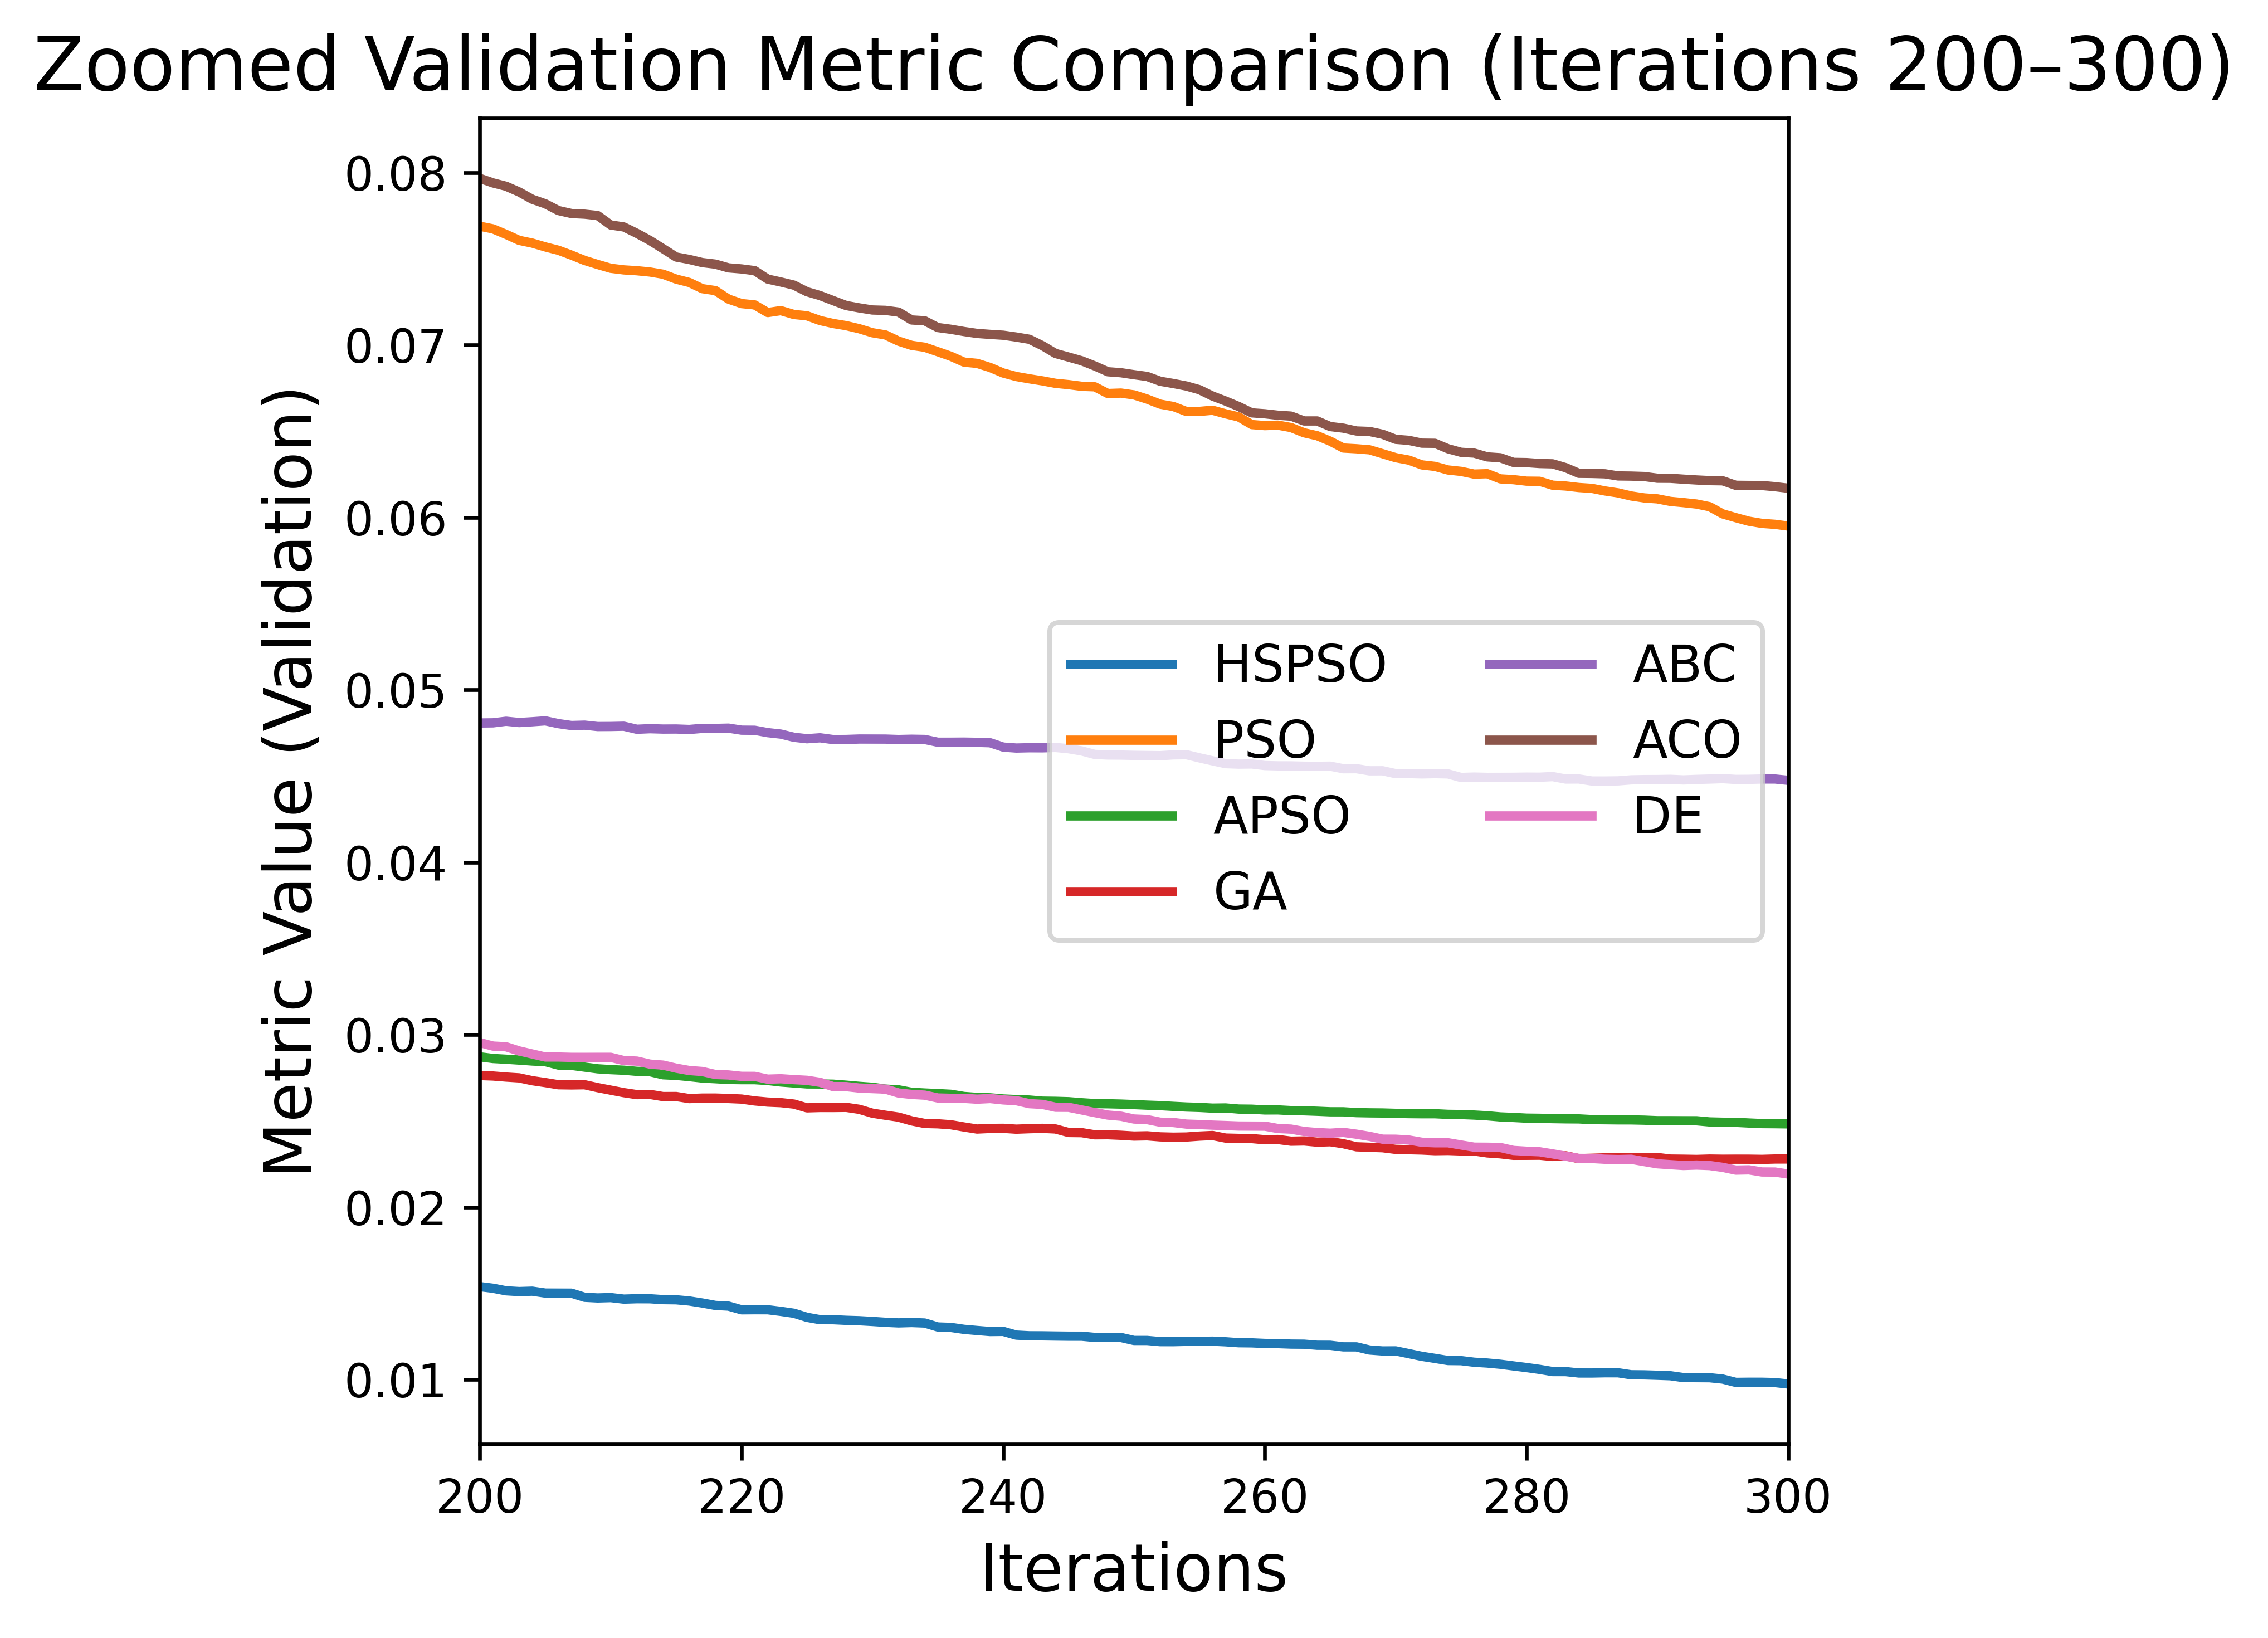

[Saved] /content/drive/MyDrive/ALL_methods_val_curve_zoom_200_300_20x6.png


In [217]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===== 你各方法 CSV 的路徑（Drive）=====
csv_map = {
    "HSPSO": "/content/drive/MyDrive/HSPSO_metric_curve_1000.csv",
    "PSO":   "/content/drive/MyDrive/PSO_metric_curve_1000.csv",
    "APSO":  "/content/drive/MyDrive/APSO_metric_curve_1000.csv",
    "GA":    "/content/drive/MyDrive/GA_metric_curve_1000.csv",
    "ABC":   "/content/drive/MyDrive/ABC_metric_curve_1000.csv",
    "ACO":   "/content/drive/MyDrive/ACO_metric_curve_1000.csv",
    "DE":    "/content/drive/MyDrive/DE_metric_curve_1000.csv",
}

# ===== 要放大看的區間 =====
x_start, x_end = 200, 300

# ===== 讀取可用檔案 =====
data = {}
missing = []

for name, path in csv_map.items():
    if not os.path.exists(path):
        missing.append(name)
        continue

    df = pd.read_csv(path)
    val_cols = [c for c in df.columns if c.startswith("Val_")]
    if len(val_cols) == 0:
        print(f"⚠️ {name} 找不到 Val_ 欄位，跳過")
        continue

    val_col = val_cols[0]
    data[name] = (df["Iteration"].values, df[val_col].values)

if missing:
    print("⚠️ 這些方法的 CSV 沒找到（先略過）：", missing)

if len(data) == 0:
    raise RuntimeError("沒有任何可用的 CSV 被讀到，請確認 Drive 路徑與檔名。")

# ===== 畫放大區域圖 =====
plt.figure(figsize=(5,5), dpi=600)

for name, (it, y) in data.items():
    it = np.array(it)
    y  = np.array(y)

    mask = (it >= x_start) & (it <= x_end)
    if mask.sum() == 0:
        print(f"⚠️ {name} 在 {x_start}~{x_end} 沒有資料點，跳過")
        continue

    plt.plot(it[mask], y[mask], linewidth=2, label=name)

plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Metric Value (Validation)", fontsize=14)
plt.title(f"Zoomed Validation Metric Comparison (Iterations {x_start}–{x_end})", fontsize=16)

# X 軸每 10 一格（放大區域比較清楚）


# 不要格線
# plt.grid(False)

plt.xlim(x_start, x_end)
plt.legend(fontsize=11, ncol=2)
plt.tight_layout()

# ===== 存到 Drive =====
out_path = f"/content/drive/MyDrive/ALL_methods_val_curve_zoom_{x_start}_{x_end}_20x6.png"
plt.savefig(out_path, dpi=600, bbox_inches="tight")
plt.show()

print("[Saved]", out_path)
